# Lecture 13 Data Exploration and Preprocessing <a id="section0"/>

- [13.1 Exploratory Data Analysis](#section1)
- [13.2 Preprocessing Numerical Data: Feature Scaling](#section2)
    - [13.2.1 Normalization](#section3)
    - [13.2.2 Standardization](#section4)
    - [13.2.1 Robust Scaling](#section5)
- [13.3 Preprocessing Categorical Data](#section6)
    - [13.3.1 Mapping Method](#section7)
    - [13.3.2 Ordinal Encoding](#section8)
    - [13.3.3 Label Encoding](#section9)
    - [13.3.4 Pandas Dummies](#section10)
    - [13.3.4 One-Hot Encoding](#section11)
- [13.4 Combining Numerical and Categorical Features](#section12)
- [13.5 Model Pipelines](#section13)
- [References](#section15)


# 13.1 Exploratory Data Analysis <a id="section1"/>

Exploratory Data Analysis (EDA) is an important step in all data science projects, and involves several steps to better understand the data. 

EDA typically includes inspecting the summary statistics of the data, observing if there are missing values and adopting the appropriate strategy for handling them, checking the distribution of the features and whether there is correlation between features, understanding which features are important and worth keeping and which ones are less important, and similar.  

To provide an example of EDA, we will use Titanic dataset which can be loaded from Seaborn datasets.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')

Let's check the basic information about the data. There are 891 rows (samples) and 15 columns (features). We can see below the data types of each column. 

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


Let's display the first and last five rows.

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


Let's also see the summary statistic. Recall that statistics are shown only for the columns with numerical data. 

In [6]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Each row presents data for one passenger on Titanic. Let's assume that the task is to predict whether the passenger survived, that is, the `survived` column will be the target labels, and we will implement a classification algorithm to predict it based on the other columns in the dataset.

### Explore Column Information

Let's inspect some of the columns 

How many passengers survived and how many died?

In [7]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:>

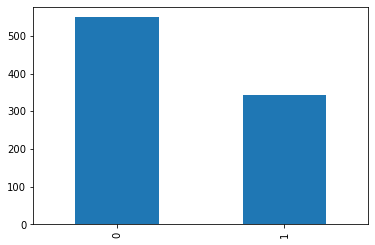

In [8]:
titanic['survived'].value_counts().plot(kind='bar')

Note that there is a column called `alive` which is the same as the `survived` column. We need to remove this column from the data, otherwise the classifier will just use that column to make predictions for the survived passengers, and will achieve 100% accuracy. 

In [9]:
titanic['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [10]:
titanic.drop(['alive'], axis=1, inplace=True)

There are two columns called `class` and `plass`. Let's examine how many passengers are in these columns? 

In [11]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [12]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [13]:
p_class = titanic[['pclass', 'class']]
p_class.head()

,pclass,class
0,3,Third
1,1,First
2,3,Third
3,1,First
4,3,Third


It seems that both of these columns are the same except that one is numeric and the other is text. Less drop `class` column. 

In [14]:
titanic.drop(['class'], axis=1, inplace=True)

Let's explore the two columns `embarked` and `embark_town`.

In [15]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [16]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

They are the same, therefore, drop `embarked`.

In [17]:
titanic.drop(['embarked'], axis=1, inplace=True)

Let's plot the occurrences in `embark_town`. Note that there are several matplotlib functions which allow to plot data directly from pandas dataframes. The syntax is somewhat different than the regular matplotlib functions, and admittedly, the functionality for plotting from pandas is limited. 

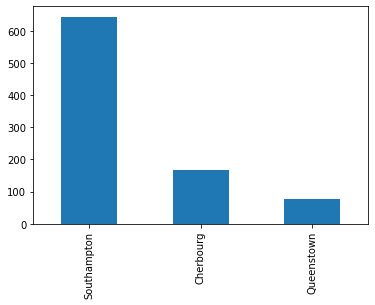

In [18]:
titanic['embark_town'].value_counts().plot(kind='bar')
plt.show()

How many men and women are there in the dataset?

In [19]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

<AxesSubplot:>

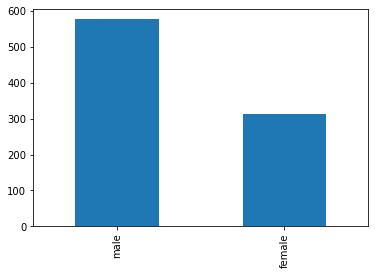

In [20]:
titanic['sex'].value_counts().plot(kind='bar')

In [21]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

The column `who` is similar to the gender, but it also includes the children. 

As an exercise, let's show the categories of the column `who` using a Pie Chart to depict their values.

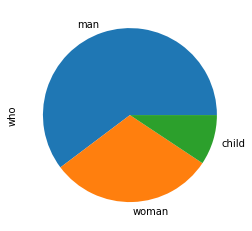

In [22]:
titanic.who.value_counts().plot(kind='pie')
plt.show()

In [23]:
titanic['adult_male'].value_counts()

True     537
False    354
Name: adult_male, dtype: int64

### Missing Data

Which columns have data missing?

In [24]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

There are missing data in `age`, `deck`, and `embark_town` columns. The `deck` column has too many rows missing, and probably the deck on which the passenger boarded the ship is not too important, so let's drop it. 

In [25]:
titanic.drop(['deck'], axis=1, inplace=True)

Since there are only 2 rows missing in `embark town` let's remove those two rows. 

In [26]:
titanic.dropna(subset=['embark_town'], axis=0, inplace=True)

Now we have Nan values only in the `age` column. 

In [27]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
who              0
adult_male       0
embark_town      0
alone            0
dtype: int64

There are several ways to deal with this. One is to replace the missing values in the `age` column with the average value of the age of passengers, or with some other value (e.g., 0). Let's create a new dataframe, which replaces the missing values with the average age. 

In [28]:
titanic_filled = titanic.fillna(titanic.mean(axis=0))

We can see that there are no missing values after that. 

In [29]:
titanic_filled.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
who            0
adult_male     0
embark_town    0
alone          0
dtype: int64

Note below that the missing value in row 5 has been replaced with the average age of 29.64 years.

In [30]:
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True
5,0,3,male,NaN,0,0,8.4583,man,True,Queenstown,True
6,0,1,male,54.0,0,0,51.8625,man,True,Southampton,True
7,0,3,male,2.0,3,1,21.0750,child,False,Southampton,False
8,1,3,female,27.0,0,2,11.1333,woman,False,Southampton,False
9,1,2,female,14.0,1,0,30.0708,child,False,Cherbourg,False


In [31]:
titanic_filled.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.000000,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.000000,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.000000,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.000000,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.000000,0,0,8.0500,man,True,Southampton,True
5,0,3,male,29.642093,0,0,8.4583,man,True,Queenstown,True
6,0,1,male,54.000000,0,0,51.8625,man,True,Southampton,True
7,0,3,male,2.000000,3,1,21.0750,child,False,Southampton,False
8,1,3,female,27.000000,0,2,11.1333,woman,False,Southampton,False
9,1,2,female,14.000000,1,0,30.0708,child,False,Cherbourg,False


Another alternative is to drop the rows with the missing values for the `age`. Let's select this strategy. In general, we can try both strategies and check which one produces better results. 

In [32]:
titanic.dropna(inplace=True)

In [33]:
titanic.reset_index(inplace=True)

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        712 non-null    int64  
 1   survived     712 non-null    int64  
 2   pclass       712 non-null    int64  
 3   sex          712 non-null    object 
 4   age          712 non-null    float64
 5   sibsp        712 non-null    int64  
 6   parch        712 non-null    int64  
 7   fare         712 non-null    float64
 8   who          712 non-null    object 
 9   adult_male   712 non-null    bool   
 10  embark_town  712 non-null    object 
 11  alone        712 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(3)
memory usage: 57.1+ KB


### Checking Feature Distribution

Let's check the distribution of the numerical columns in the dataset.

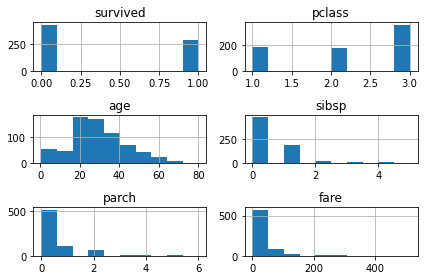

In [35]:
titanic[['survived','pclass','age','sibsp','parch','fare']].hist(bins=10)
plt.tight_layout()
plt.show()

Or, we can inspect the distribution of each feature. 

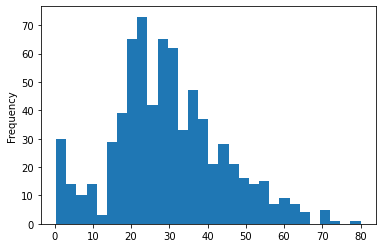

In [36]:
titanic['age'].plot(kind='hist', bins=30)
plt.show()

This plot shows the counts for the `survived` column grouped by `pclass`.

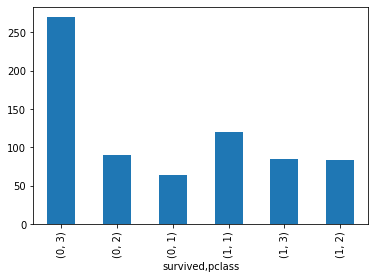

In [37]:
titanic.groupby('survived')['pclass'].value_counts().plot(kind="bar")
plt.show()

Although pandas library provides some functionality for plotting directly from dataframes, there are also libraries which provide improved graphs. Among the most popular such libraries is [Seaborn](http://seaborn.pydata.org/). A few plots created with Seaborn are shown below. 

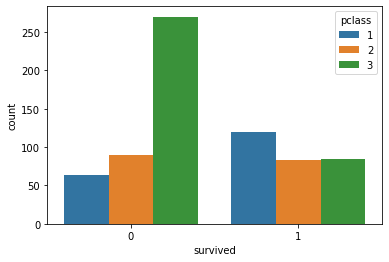

In [38]:
sns.countplot(data=titanic, x='survived', hue='pclass')
plt.show()

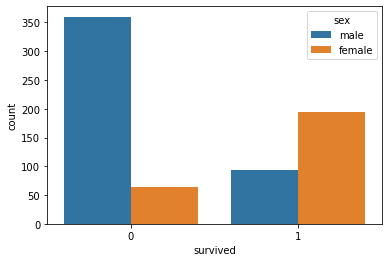

In [39]:
sns.countplot(data=titanic, x='survived', hue='sex')
plt.show()

In the next plot we can see a scatter plot of the age, grouped by fare and class. As expected, the fare in the first class was more expensive, in comparison to the second and third classes. 

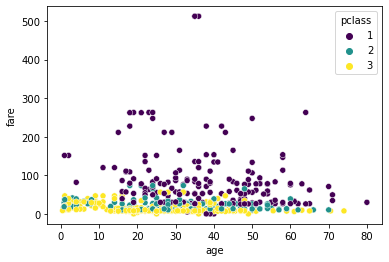

In [40]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='pclass', palette='viridis')
plt.show()

### Checking Correlated Features

Checking correlation can help to identify similarities between features. If two features are correlated, that means they contain similar or perhaps the same information, and if one of them is removed, the analysis/model can be less affected. 

In [41]:
correlation = titanic.corr()
correlation

,index,survived,pclass,age,sibsp,parch,fare,adult_male,alone
index,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655,0.024069,0.059677
survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100,-0.551151,-0.199741
pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893,0.094635,0.150576
age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,0.286543,0.195766
sibsp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860,-0.313016,-0.629408
parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624,-0.365580,-0.577109
fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000,-0.177446,-0.262799
adult_male,0.024069,-0.551151,0.094635,0.286543,-0.313016,-0.365580,-0.177446,1.000000,0.400718
alone,0.059677,-0.199741,0.150576,0.195766,-0.629408,-0.577109,-0.262799,0.400718,1.000000


It seems that `survived` is most correlated with `adult_male`, `pclass`, `fare`, and `alone`, and less correlated with `age`, `sibsp` (siblings), and `parch` (parent or child).

In [42]:
correlation['survived']

index         0.029526
survived      1.000000
pclass       -0.356462
age          -0.082446
sibsp        -0.015523
parch         0.095265
fare          0.266100
adult_male   -0.551151
alone        -0.199741
Name: survived, dtype: float64

In [43]:
correlation['fare']

index         0.009655
survived      0.266100
pclass       -0.552893
age           0.093143
sibsp         0.139860
parch         0.206624
fare          1.000000
adult_male   -0.177446
alone        -0.262799
Name: fare, dtype: float64

The following heatmap shows the correlation between all features. 

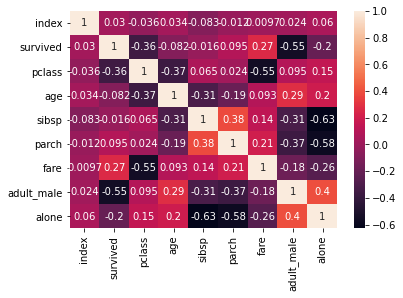

In [44]:
sns.heatmap(correlation, annot=True)
plt.show()

# 13.2 Preprocessing Numerical Data: Feature Scaling <a id="section2"/>

Typically, data can be classified into two main categories:

* __Numeric__: a quantity represented by a real or integer number.
* __Categorical__: a discrete value, typically represented by string labels taken from a finite list of possible choices.

However, note that it is also possible to have categorical data represented by numbers (from a discrete set). And object dtypes can represent data that would be better represented as continuous numbers (i.e., dates). Therefore, it is important to always understand well what the data in each feature represents.

Most machine learning models are sensitive to the range of values that are used for numerical inputs, and expect the input features to be scaled before processing. ***Feature scaling*** is transforming the numerical features into a small range of values. 

Common scaling techniques include:
* Normalization
* Standardization
* Robust scaling

Whether or not a machine learning model requires scaling of the features depends on the model family. Linear models, such as logistic regression, generally benefit from scaling the features, while other models such as tree-based models (i.e. decision trees, random forests) do not need such preprocessing. This is because several models (logistic regression, SGD) use a gradient descent solver to find their optimal parameters, and the solver converges faster when the features are scaled.

## 13.2.1 Normalization <a id="section3"/>

Normalization is a scaling technique that transforms numerical features into a range of values between 0 and 1. When we work with features that have different ranges of values, normalizing the features can be a good practice. For example, if we have one feature in the range from 100-1000, and another varies from 0.05-0.2, we can scale them so that they both have the range of values from 0 to 1. 

Normalizing data is performed using the following formula, where $Xmin$ is the minimum value of feature $X$, and $Xmax$ is the maximum value of $X$. 

$$
Xnorm = \frac {X-Xmin} {Xmax-Xmin}
$$

For illustration purposes, we will use a smaller dataset called `tips` available in Seaborn. 

In [45]:
tip_data = sns.load_dataset('tips')
tip_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Let's separate all numerical features from the above data into a new dataframe. 

In [46]:
num_feats = tip_data[['total_bill', 'tip', 'size']]

Scikit-learn provides the ***transformer*** function `MinMaxScaler` to scale the data to the range between 0 and 1. That is the default range, but we can also select an arbitrary range to scale the data. 

The `fit` method in the code below fits the data, and afterwards the `transform` method scales the data. Namely, the `fit` method for transformers is similar to the `fit` method for estimators in scikit-learn, however, it takes a single argument (data) instead of two arguments (data and target). Also, the `transform` method for transformers is similar to the `predict` method for estimators, but instead of outputting predictions, it outputs a transformed version of the input data. The syntax is `transformer.fit(data)` and `transformer.transform(data)`

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(num_feats)

num_std = scaler.transform(num_feats)
num_std[:5]

array([[0.29157939, 0.00111111, 0.2       ],
       [0.1522832 , 0.07333333, 0.4       ],
       [0.3757855 , 0.27777778, 0.4       ],
       [0.43171345, 0.25666667, 0.2       ],
       [0.45077503, 0.29      , 0.6       ]])

Scikit-learn also provides a combined method `fit_transform` which calls first `fit` and then `transform`.

In [48]:
num_scaled = scaler.fit_transform(num_feats)
num_scaled[:5]

array([[0.29157939, 0.00111111, 0.2       ],
       [0.1522832 , 0.07333333, 0.4       ],
       [0.3757855 , 0.27777778, 0.4       ],
       [0.43171345, 0.25666667, 0.2       ],
       [0.45077503, 0.29      , 0.6       ]])

The output of MinMaxScaler is a NumPy array, with the values in each column scaled in the range between 0 and 1.

One note is that the methods `fit` and `transform` are used with the training dataset, but only `transform` is used with the test dataset. This is because we would like the same scaling that was applied to the train dataset to be applied to the test dataset.

## 13.2.2 Standardization <a id="section4"/>

Standardization is another scaling technique where numerical features are rescaled to have 0 mean ($\mu$) and 1 standard deviation (std or $\sigma$ ). 

The formula of standardization is as follows, where $Xstd$ is the standardized feature, $X$ is the original feature, $\mu$ is mean of the feature, and $\sigma$ is the standard deviation. 

$$
Xstd = \frac {X - \mu} {\sigma}
$$

When should we standardize the features? When we know that the training data has a normal (Gaussian) distribution. And, if the data does not have normal distribution, then normalization is a preferable scaling technique. 

With some algorithms the performance will be the same with normalization or standardization scaling, but with other algorithms, there can be a difference in the performance. Therefore, in some cases, we can try them both, especially if we are not sure about the distribution of the data.  

Standardization is implemented in scikit-Learn with the `StandardScaler`.

In [49]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

num_std = std_scaler.fit_transform(num_feats)
num_std[:5]

array([[-0.31471131, -1.43994695, -0.60019263],
       [-1.06323531, -0.96920534,  0.45338292],
       [ 0.1377799 ,  0.36335554,  0.45338292],
       [ 0.4383151 ,  0.22575414, -0.60019263],
       [ 0.5407447 ,  0.4430195 ,  1.50695847]])

We can inspect the mean and standard variation of the original data using the `mean_` and `var_` attributes. The convention in scikit-learn is that if an attribute is learned from the data, its name
ends with an underscore, as in `mean_` and `var_` for the StandardScaler. Other scikit-learn transformers also compute different statistics and store them as attributes of the scaler.

In [50]:
# The mean of each feature in the original data
std_scaler.mean_

array([19.78594262,  2.99827869,  2.56967213])

In [51]:
# Variance of the original features
std_scaler.var_

array([78.92813149,  1.90660851,  0.9008835 ])

The scaled data `num_std` has zero mean an unit variance.

In [52]:
print(f'The mean of scaled data: {np.round(num_std.mean(axis=0))}')
print(f'The standard deviation of scaled data: {num_std.std(axis=0)}')

The mean of scaled data: [-0.  0. -0.]
The standard deviation of scaled data: [1. 1. 1.]


## 13.2.3 Robust Scaling <a id="section5"/>

Scikit-learn provides another scaling method called `RobustScaler`, which scales the data in a similar way as standardization, but is more suitable when the data contain many outliers. 

The data is scaled so that it has a median of 0, and the scaled range is the Interquartile Range(IQR), that is, the difference between the 1st quartile (25th percentile) and the 3rd quartile (75th percentile).

In [53]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
num_rob_scaled = rob_scaler.fit_transform(num_feats)

num_rob_scaled[:5]

array([[-0.07467532, -1.2096    ,  0.        ],
       [-0.69155844, -0.7936    ,  1.        ],
       [ 0.29823748,  0.384     ,  1.        ],
       [ 0.54591837,  0.2624    ,  0.        ],
       [ 0.63033395,  0.4544    ,  2.        ]])

We can confirm that the columns in the scaled data have 0 median. 

In [54]:
print(f'The median of scaled data: {np.round(np.median(num_rob_scaled, axis=0))}')

The median of scaled data: [-0.  0.  0.]


# 13.3 Preprocessing Categorical Data <a id="section6"/>

Categorical data contain limited number of discrete categories. An example is the feature `who` that has three categories: `man`, `woman`, and `child`.

In many cases, categorical features have text values, and they need to be converted into numerical values in order to be processed by machine learning algorithms. 

We will look into the following techniques to convert categorical features into numbers:
* Mapping method
* Ordinal encoding
* Label encoding
* Pandas dummies
* One-hot encoding

The first three techniques produce single number for each category, and the last two techniques produce one-hot matrix. 

We are going to use again the Titanic dataset, which has several categorical features. 

In [55]:
titanic.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


## 13.3.1 Mapping Method <a id="section7"/>

Mapping method is a straightforward way to encode categorical features when there are few categories. For instance, for the `who` feature, we create a dictionary whose keys are the the three categories `man`, `woman`, `child`, and they are mapped to numerical values 0, 1, and 2. 

In [56]:
titanic['who'].value_counts()

man      413
woman    216
child     83
Name: who, dtype: int64

In [57]:
map_dict = {'man': 0, 'woman': 1, 'child': 2}

In [58]:
titanic['who'] = titanic['who'].map(map_dict)

Now the `who` feature is encoded, and all instances whith the class `man` wer replaced with `0`, and the same applies to the other two classes. 

In [59]:
titanic.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,0,True,Southampton,False
1,1,1,1,female,38.0,1,0,71.2833,1,False,Cherbourg,False
2,2,1,3,female,26.0,0,0,7.9250,1,False,Southampton,True
3,3,1,1,female,35.0,1,0,53.1000,1,False,Southampton,False
4,4,0,3,male,35.0,0,0,8.0500,0,True,Southampton,True


In [60]:
titanic['who'].value_counts()

0    413
1    216
2     83
Name: who, dtype: int64

## 13.3.2 Ordinal Encoding <a id="section8"/>

Ordinal encoding can be implemented with the `OrdinalEncoder` in scikit-learn, which will automatically encode each category with a different number.

Let's apply it to the columns `alone` and `adult_male`. 

In [61]:
titanic['alone'].value_counts()

True     402
False    310
Name: alone, dtype: int64

In [62]:
titanic['adult_male'].value_counts()

True     413
False    299
Name: adult_male, dtype: int64

In [63]:
from sklearn.preprocessing import OrdinalEncoder

categs_feats = titanic[['alone', 'adult_male']]

encoder = OrdinalEncoder()

categs_encoded = encoder.fit_transform(categs_feats)

The output of the encoder is a NumPy array `categs_encoded`, and we can convert it back to pandas dataframe. 

Note that the text values in the columns `alone` and `adult_male` have been replaced with a numeric value `0` or`1`.

In [64]:
titanic[['alone', 'adult_male']] = pd.DataFrame(categs_encoded, columns=categs_feats.columns, index=categs_feats.index)
titanic.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,0,1.0,Southampton,0.0
1,1,1,1,female,38.0,1,0,71.2833,1,0.0,Cherbourg,0.0
2,2,1,3,female,26.0,0,0,7.9250,1,0.0,Southampton,1.0
3,3,1,1,female,35.0,1,0,53.1000,1,0.0,Southampton,0.0
4,4,0,3,male,35.0,0,0,8.0500,0,1.0,Southampton,1.0


In [65]:
titanic['alone'].value_counts()

1.0    402
0.0    310
Name: alone, dtype: int64

We could check the mapping between the categories and the numerical values via the attribute `categories_`.

In [66]:
encoder.categories_

[array([False,  True]), array([False,  True])]

Note that OrdinalEncoder can not handle missing values, and if we try to apply it to a column with missing values, we will get an error.

Also, we need to be careful when applying this encoding strategy, because by default, `OrdinalEncoder` uses a lexicographical strategy to map string category labels to integers. For instance, suppose the dataset has a categorical variable named `"size"` with categories such as "S", "M", "L", "XL", and we would like the integer representation to respect the meaning of the sizes by mapping them to increasing integers such as `0, 1, 2, 3`. However, the lexicographical strategy used by default would map the labels "S", "M", "L", "XL" to 2, 1, 0, 3, by following the alphabetical order. To avoid that, we can pass  a list with the expected ordering to the `categories` argument for each feature (e.g., `encoder = OrdinalEncoder(categories=[True, False]` for the column `alone`). 

If a categorical variable does not carry any meaningful order information, then we can consider using one-hot encoding described below. 

# 13.3.3 Label Encoding <a id="section9"/>

Label encoding can also be used to encode categorical features as ordinal features with the `LabelEncoder` in scikit-learn. 

Let's apply the LabelEncoder to the `embark_town` column.

In [67]:
from sklearn.preprocessing import LabelEncoder

embtown_feat = titanic[['embark_town']]

label_encoder = LabelEncoder()

embtown_encoded = label_encoder.fit_transform(embtown_feat)

C:\Users\avaka\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The output of Label Encoder is also a NumPy array. Let's convert it to a pandas dataframe, and add it as a new column `embark_town_ord`. 

In [68]:
titanic['embark_town_ord'] = pd.DataFrame(embtown_encoded, columns=embtown_feat.columns, index=embtown_feat.index)

titanic.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,embark_town_ord
0,0,0,3,male,22.0,1,0,7.2500,0,1.0,Southampton,0.0,2
1,1,1,1,female,38.0,1,0,71.2833,1,0.0,Cherbourg,0.0,0
2,2,1,3,female,26.0,0,0,7.9250,1,0.0,Southampton,1.0,2
3,3,1,1,female,35.0,1,0,53.1000,1,0.0,Southampton,0.0,2
4,4,0,3,male,35.0,0,0,8.0500,0,1.0,Southampton,1.0,2


In [69]:
label_encoder.classes_

array(['Cherbourg', 'Queenstown', 'Southampton'], dtype=object)

In [70]:
titanic['embark_town_ord'].value_counts()

2    554
0    130
1     28
Name: embark_town_ord, dtype: int64

# 13.3.4. Pandas Dummies <a id="section10"/>

Pandas provides a function `get_dummies` that can be also used to handle categorical features. This function creates new columns based on the 
number of available categories in a target column. For example, let's apply it to the feature `sex`. 

In [71]:
titanic.head()

,index,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone,embark_town_ord
0,0,0,3,male,22.0,1,0,7.2500,0,1.0,Southampton,0.0,2
1,1,1,1,female,38.0,1,0,71.2833,1,0.0,Cherbourg,0.0,0
2,2,1,3,female,26.0,0,0,7.9250,1,0.0,Southampton,1.0,2
3,3,1,1,female,35.0,1,0,53.1000,1,0.0,Southampton,0.0,2
4,4,0,3,male,35.0,0,0,8.0500,0,1.0,Southampton,1.0,2


In [72]:
dummies = pd.get_dummies(titanic['sex'])

In [73]:
titanic = pd.concat([titanic.drop('sex',axis=1),dummies], axis=1)

Note that new columns `female` and `male` with 0 or 1 values were added to the right of the dataframe.

In [74]:
titanic.head()

,index,survived,pclass,age,sibsp,parch,fare,who,adult_male,embark_town,alone,embark_town_ord,female,male
0,0,0,3,22.0,1,0,7.2500,0,1.0,Southampton,0.0,2,0,1
1,1,1,1,38.0,1,0,71.2833,1,0.0,Cherbourg,0.0,0,1,0
2,2,1,3,26.0,0,0,7.9250,1,0.0,Southampton,1.0,2,1,0
3,3,1,1,35.0,1,0,53.1000,1,0.0,Southampton,0.0,2,1,0
4,4,0,3,35.0,0,0,8.0500,0,1.0,Southampton,1.0,2,0,1


This type of encoding is also called one-hot encoding, where each category (unique value) in the column `sex` became a column, and for each row (sample), 1 specifies the category to which it belongs to.

# 13.3.5. One-Hot Encoding <a id="section11"/>

Scikit-learn provides a function `OneHotEncoder` that converts a feature into one-hot matrix. As with the pandas dummies, additional columns corresponding to the values of the given categories are created. 

Let's apply it to `embark_town`.

In [75]:
titanic['embark_town'].value_counts()

Southampton    554
Cherbourg      130
Queenstown      28
Name: embark_town, dtype: int64

In [76]:
titanic.head()

,index,survived,pclass,age,sibsp,parch,fare,who,adult_male,embark_town,alone,embark_town_ord,female,male
0,0,0,3,22.0,1,0,7.2500,0,1.0,Southampton,0.0,2,0,1
1,1,1,1,38.0,1,0,71.2833,1,0.0,Cherbourg,0.0,0,1,0
2,2,1,3,26.0,0,0,7.9250,1,0.0,Southampton,1.0,2,1,0
3,3,1,1,35.0,1,0,53.1000,1,0.0,Southampton,0.0,2,1,0
4,4,0,3,35.0,0,0,8.0500,0,1.0,Southampton,1.0,2,0,1


In [77]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder()

town_encoded = one_hot.fit_transform(titanic[['embark_town']])

In [78]:
one_hot.categories_

[array(['Cherbourg', 'Queenstown', 'Southampton'], dtype=object)]

In [79]:
town_encoded

<712x3 sparse matrix of type '<class 'numpy.float64'>'
	with 712 stored elements in Compressed Sparse Row format>

The output of OneHotEncoder is a sparse matrix. We will need to convert it into NumPy array. And afterward we can convert it into pandas dataframe. 

In [80]:
town_encoded = town_encoded.toarray()

In [81]:
columns = list(one_hot.categories_)

town_df = pd.DataFrame(town_encoded, columns=columns)

town_df.head()

,Cherbourg,Queenstown,Southampton
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [82]:
titanic.drop('embark_town',axis=1, inplace=True)

In [83]:
titanic[['Cherbourg', 'Queenstown', 'Southampton']] = town_df

In [84]:
titanic.head()

,index,survived,pclass,age,sibsp,parch,fare,who,adult_male,alone,embark_town_ord,female,male,Cherbourg,Queenstown,Southampton
0,0,0,3,22.0,1,0,7.2500,0,1.0,0.0,2,0,1,0.0,0.0,1.0
1,1,1,1,38.0,1,0,71.2833,1,0.0,0.0,0,1,0,1.0,0.0,0.0
2,2,1,3,26.0,0,0,7.9250,1,0.0,1.0,2,1,0,0.0,0.0,1.0
3,3,1,1,35.0,1,0,53.1000,1,0.0,0.0,2,1,0,0.0,0.0,1.0
4,4,0,3,35.0,0,0,8.0500,0,1.0,1.0,2,0,1,0.0,0.0,1.0


### Choosing an encoding strategy

Choosing an encoding strategy depends on the used models and the type of categories (i.e., ordinal vs. nominal). In general, One-Hot Encoding is the encoding strategy used when the downstream models are linear models, while Ordinal Encoding is often a good strategy with tree-based models.

With ordinal encoding, there is an order in the resulting categories, e.g. `0 < 1 < 2` (called ***ordinal categories***). The impact of violating this ordering assumption is dependent on the downstream models. Linear models will be impacted by misordered categories, while tree-based models will not.

One-hot encoding is applied when the ordering of the categories is not important. Such categories are also called ***nominal categories***. This encoding can cause computational inefficiency in tree-based models with high number of categories, and because of this, it is not recommended to use with these models.

# 13.4 Combining Numerical and Categorical Features <a id="section12"/>

Now let's prepare the numeric and categorical data in `titanic` datset and train a classification model.

First, assign the `survived` column to be the target label, and the other columns to be data features. 

In [85]:
X = titanic.drop('survived', axis=1)
y = titanic['survived']

In [86]:
X

,index,pclass,age,sibsp,parch,fare,who,adult_male,alone,embark_town_ord,female,male,Cherbourg,Queenstown,Southampton
0,0,3,22.0,1,0,7.2500,0,1.0,0.0,2,0,1,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1,0.0,0.0,0,1,0,1.0,0.0,0.0
2,2,3,26.0,0,0,7.9250,1,0.0,1.0,2,1,0,0.0,0.0,1.0
3,3,1,35.0,1,0,53.1000,1,0.0,0.0,2,1,0,0.0,0.0,1.0
4,4,3,35.0,0,0,8.0500,0,1.0,1.0,2,0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,885,3,39.0,0,5,29.1250,1,0.0,0.0,1,1,0,0.0,1.0,0.0
708,886,2,27.0,0,0,13.0000,0,1.0,1.0,2,0,1,0.0,0.0,1.0
709,887,1,19.0,0,0,30.0000,1,0.0,1.0,2,1,0,0.0,0.0,1.0
710,889,1,26.0,0,0,30.0000,0,1.0,1.0,0,0,1,1.0,0.0,0.0


We will apply the standard scaling of the feature, and we will create train and test datasets.

In [87]:
# Apply StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [88]:
from sklearn.model_selection import train_test_split

# split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, stratify=y)

In [89]:
print('Training data inputs', X_train.shape)
print('Training labels', y_train.shape)
print('Testing data inputs', X_test.shape)
print('Testing labels', y_test.shape)

Training data inputs (534, 15)
Training labels (534,)
Testing data inputs (178, 15)
Testing labels (178,)


Now, let's apply Logistic Regression, k-Nearest Neighbor, and Random Forest classifiers.

In [90]:
from sklearn import neighbors

# create the model
knn_model = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn_model.fit(X_train, y_train)

# score on test set
accuracy = knn_model.score(X_test, y_test)
print('The test accuracy of k-Nearest Neighbors is {0:5.2f} %'.format(accuracy*100))

The test accuracy of k-Nearest Neighbors is 83.15 %


In [91]:
from sklearn.linear_model import LogisticRegression

# create the model
lr_model = LogisticRegression(random_state=1)

# fit the model
lr_model.fit(X_train, y_train)

# score on test set
accuracy = lr_model.score(X_test, y_test)
print('The test accuracy of Logistic Regression is {0:5.2f} %'.format(accuracy*100))

The test accuracy of Logistic Regression is 82.58 %


In [92]:
from sklearn.ensemble import RandomForestClassifier

# create the model
rf_model = RandomForestClassifier(criterion='gini', n_estimators=100, random_state=1, n_jobs=2)

# fit the model
rf_model.fit(X_train, y_train)

# score on test set
accuracy = rf_model.score(X_test, y_test)
print('The test accuracy of Random Forest is {0:5.2f} %'.format(accuracy*100))

The test accuracy of Random Forest is 83.15 %


# 13.5 Model Pipelines <a id="section13"/>

We can combine sequential operations with a scikit-learn `Pipeline`, which chains together operations. The helper function `make_pipeline` is used to create a `Pipeline`, and takes as arguments the successive transformations to perform, followed by the classifier or regressor model.

Let's create a pipeline consisting of a Standard Scaler function and a Logistic Regression classifier. 

In [93]:
from sklearn.pipeline import make_pipeline

lr_model_1 = make_pipeline(StandardScaler(), LogisticRegression())

The pipeline with perform data scaling and afterward will fit the model to the data. 

In [94]:
X1 = titanic.drop('survived', axis=1)
y1 = titanic['survived']

In [95]:
# split into train & test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=123, stratify=y1)

In [96]:
# fit the pipeline model
lr_model_1.fit(X1_train, y1_train)

# score our model on the test data
accuracy = lr_model_1.score(X1_test, y1_test)
print('The test accuracy of Logistic Regression is {0:5.2f} %'.format(accuracy*100))

The test accuracy of Logistic Regression is 82.58 %


# References <a id="section15"/>

1. Complete Machine Learning Package, Jean de Dieu Nyandwi, available at: [https://github.com/Nyandwi/machine_learning_complete](https://github.com/Nyandwi/machine_learning_complete).
2. Advanced Python for Data Science, University of Cincinnati, available at: [https://github.com/uc-python/advanced-python-datasci](https://github.com/uc-python/advanced-python-datasci).
3. Python Machine Learning (2nd Ed.) Code Repository, Sebastian Raschka, available at: [https://github.com/rasbt/python-machine-learning-book-2nd-edition](https://github.com/rasbt/python-machine-learning-book-2nd-edition). 

[BACK TO TOP](#section0)